In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:

#plt.rcParams['font.family'] = ['Microsoft JhengHei']  # 設定中文字體為微軟正黑

plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore")
primaryColor = '#fd4d58'
secondaryColor = '#969494'
# sns.set(style='white',font ='Microsoft JhengHei', font_scale=2)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/112-1 MDS Final Project/Dataset/1126 Preprocessed Data.xlsx')

In [5]:
df.head()

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,accommodates,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_days,last_review_days,shared_bath,private_bath,bath,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within an hour,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_中山區,neighbourhood_cleansed_中正區,neighbourhood_cleansed_信義區,neighbourhood_cleansed_內湖區,neighbourhood_cleansed_北投區,neighbourhood_cleansed_南港區,neighbourhood_cleansed_士林區,neighbourhood_cleansed_大同區,neighbourhood_cleansed_大安區,neighbourhood_cleansed_文山區,neighbourhood_cleansed_松山區,neighbourhood_cleansed_萬華區,property_type_Barn,property_type_Cave,property_type_Entire bungalow,property_type_Entire chalet,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Farm stay,property_type_Minsu,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in casa particular,property_type_Private room in cave,property_type_Private room in condo,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in loft,property_type_Private room in minsu,property_type_Private room in rental unit,property_type_Private room in serviced apartment,property_type_Private room in tent,property_type_Private room in tiny home,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in heritage hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in cave,property_type_Shared room in condo,property_type_Shared room in guest suite,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in loft,property_type_Shared room in minsu,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Tiny home,air conditioning,baby stuffs,Backyard,balcony,BBQ,beach,bedroom supplies,bidet,books,breakfast,building staff,cable,changing table,children stuffs,cleaning available during stay,cleaning products,clothing storage,clothing supplies,coffee,ceiling fan,dining table,dreeser,dryer,elevator,essentials,ethernet connection,EV charger,exercise equipment,fire extinguisher,first aid kit,game,gas,gym,hammock,heating,host greets you,hot water,infinity,Iron,keypad,kitchen,lake access,laundromat nearby,lock,long term stays allowed,luggage dropoff allowed,microwave,mosquito net,open 24 hours,open specific hours,outdoor dining area,outdoor furniture,outdoor shower,outlet covers,oven,parking,pets allowed,piano,pool,portable fans,private entrance,private living room,record player,refrigerator,resort access,rooftop,room-darkening shades,safe,sauna,security cameras on property,self check-in,single level home,smoke alarm,smoking allowed,sound system,stove,streaming service,streaming services,table corner guards,trash compactor,tub,TV,utensils,view,washer,waterfront,wifi,window guards,workspace
0,83.0,1,1,2,1.0,1.0,1029,30.0,365.0,1,19,294,7,0,0,5.00,5.00,4.71,0,0.05,4644,1638.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [6]:
X = df.loc[:, df.columns != 'price']
y = df.loc[:, df.columns == 'price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Elastic Net

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [8]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)
enet.fit(X_train, y_train)

y_pred = enet.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))

Mean Squared Error: 1672675.84


In [9]:
enet_coef = pd.Series(enet.coef_, index = X_train.columns)
enet_coef.sort_values().head(5)

has_availability                            -169.587660
reviews_per_month                           -167.995528
property_type_Private room in rental unit   -137.242954
neighbourhood_cleansed_萬華區                  -125.163668
room_type_Shared room                       -108.693548
dtype: float64

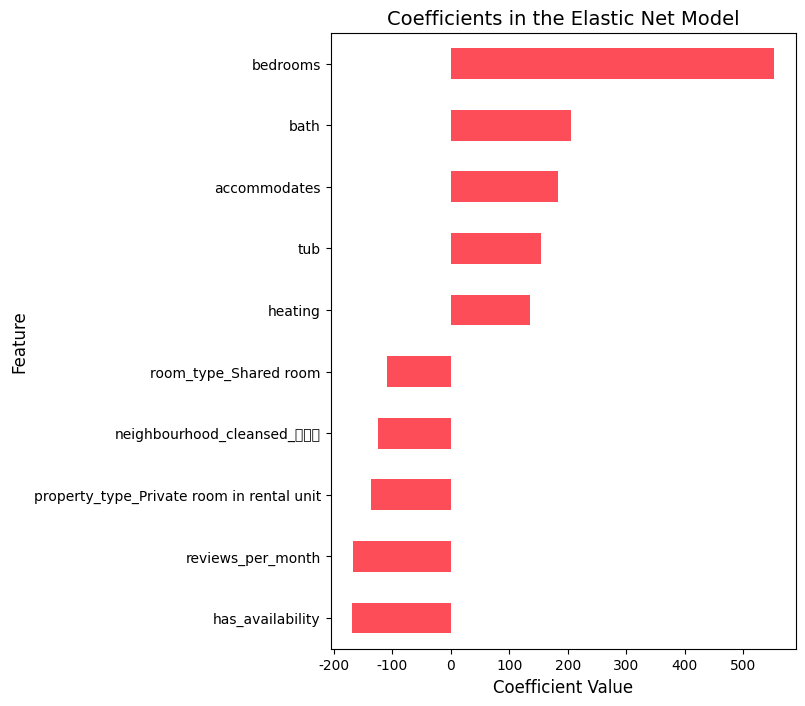

In [10]:
imp_coef = pd.concat([enet_coef.sort_values().head(5),
                      enet_coef.sort_values().tail(5)])
#enet_coef_20 = enet_coef.sort_values()

plt.rcParams['figure.figsize'] = (6.0, 8.0)

imp_coef.plot(kind="barh", fontsize=10, color=primaryColor)
#enet_coef_20.tail(20).plot(kind="barh", fontsize=10, color=primaryColor)
plt.title("Coefficients in the Elastic Net Model", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [13]:
imp_coef.to_excel('Elastic_net.xlsx')

In [15]:
len(df.columns)-1

184

In [ ]:
print("There are", len(enet_coef.where(lambda x: x != 0).dropna()), "features selected by Elastic Net.")
print('And unimportant variables are as follows:')
print(enet_coef.where(lambda x: x == 0).dropna().index)

There are 164 features selected by Elastic Net.
And unimportant variables are as follows:
Index(['property_type_Barn', 'property_type_Entire chalet',
       'property_type_Entire place',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in bungalow',
       'property_type_Private room in casa particular',
       'property_type_Private room in cave',
       'property_type_Private room in loft',
       'property_type_Private room in tent',
       'property_type_Shared room in aparthotel',
       'property_type_Shared room in minsu',
       'property_type_Shared room in serviced apartment',
       'property_type_Tiny home', 'beach', 'gas', 'hammock', 'infinity',
       'open 24 hours', 'resort access', 'stove'],
      dtype='object')


In [ ]:
enet_coef_df = pd.DataFrame(enet_coef.where(lambda x: x != 0).dropna()).reset_index()
enet_coef_df.rename(columns={"index": "feature"}, inplace=True)
enet_coef_df.drop(columns=enet_coef_df.columns[1], axis=1, inplace=True)
enet_coef_df.head()

,feature
0,host_acceptance_rate
1,host_is_superhost
2,host_has_profile_pic
3,accommodates
4,bedrooms


In [ ]:
enet_coef_df.to_excel('1202 Elastic_Net_Feature.xlsx', index=False)

### Voting

In [ ]:
vote_df = pd.DataFrame({'column':X.columns, 'vote':[0 for x in X.columns]})
vote_df.head()

,column,vote
0,host_acceptance_rate,0
1,host_is_superhost,0
2,host_has_profile_pic,0
3,accommodates,0
4,bedrooms,0


#### 1. Random Forest
reference: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
rf_selected_features = X_train.columns[(sel.get_support())]
print("There are", len(rf_selected_features), "features selected by Random Forest as follows:")
print(rf_selected_features)

There are 64 features selected by Random Forest as follows:
Index(['host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bedrooms',
       'beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_since_days', 'last_review_days', 'shared_bath', 'bath',
       'host_response_time_within an hour', 'neighbourhood_cleansed_中山區',
       'neighbourhood_cleansed_中正區', 'neighbourhood_cleansed_信義區',
       'neighbourhood_cleansed_大安區', 'neighbourhood_cleansed_萬華區',
       'property_type_Entire rental unit', 'baby stuffs', 'balcony',
       'bedroom supplies', 'cleaning products', 'clothing storage',
       'clothing supplies', 'dining table', 'elevator', 'essentials',
       'ethernet connection', 'fire extinguisher'

In [ ]:
vote_df.loc[vote_df['column'].isin(rf_selected_features), 'vote'] += 1

#### 2. XGBoost
reference: https://notebook.community/minesh1291/MachineLearning/xgboost/feature_importance_v1

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

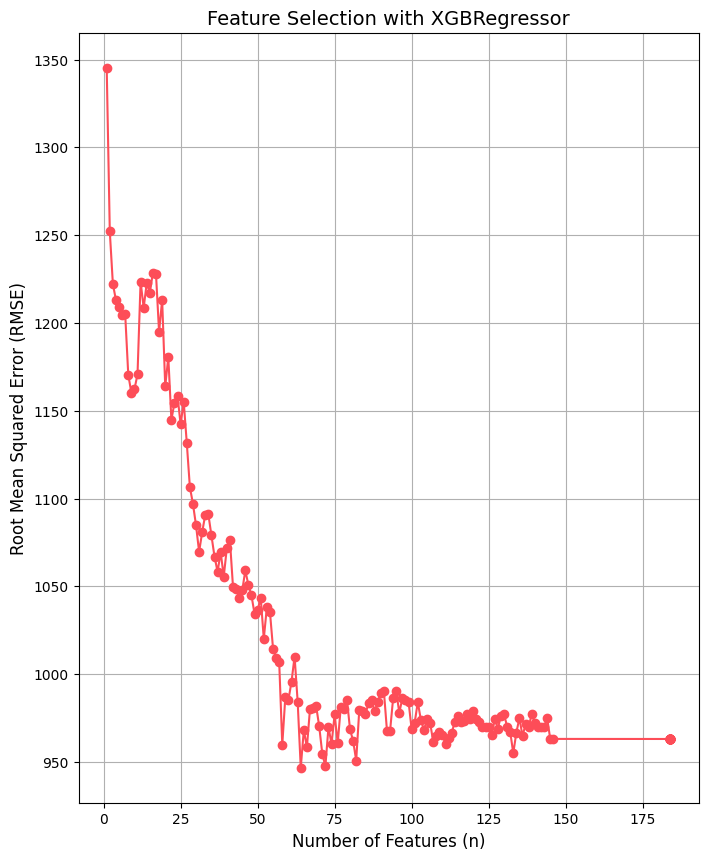

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

thresholds = sorted(model.feature_importances_)
n_values = []
rmse_values = []
min_rmse = float('inf')
best_select_X_train = None
best_selected_features = None

for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    selected_features = np.where(selection.get_support())[0]

    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    n_values.append(select_X_train.shape[1])
    rmse_values.append(rmse)
    # print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

    # Check for the minimum RMSE
    if rmse < min_rmse:
        min_rmse = rmse
        best_select_X_train = select_X_train.copy()
        best_selected_features = selected_features.copy()

plt.plot(n_values, rmse_values, marker='o', color=primaryColor)
plt.title('Feature Selection with XGBRegressor', fontsize=14)
plt.xlabel('Number of Features (n)', fontsize=12)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=12)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.grid(True)
plt.show()

In [ ]:
xgb_selected_features = X_train.columns[best_selected_features].tolist()
print("Number of features in the best model:", len(xgb_selected_features))
print("Selected feature names in the best model:", xgb_selected_features)

Number of features in the best model: 64
Selected feature names in the best model: ['accommodates', 'bedrooms', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_90', 'availability_365', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_since_days', 'last_review_days', 'shared_bath', 'bath', 'host_response_time_within a day', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_cleansed_中山區', 'neighbourhood_cleansed_士林區', 'neighbourhood_cleansed_大安區', 'neighbourhood_cleansed_萬華區', 'property_type_Cave', 'property_type_Entire guesthouse', 'property_type_Entire loft', 'property_type_Entire rental unit', 'property_type_Private room in hostel', 'property_type_Private room in rental unit', 'property_type_Room in boutique hotel', 'property_type_Room in hotel', 'baby stuffs', 'balcony', 'bidet', 'breakfast', 'building staff', 'children stuffs', 'cleaning available d

In [ ]:
vote_df.loc[vote_df['column'].isin(xgb_selected_features), 'vote'] += 1

#### 3. Lasso
reference: https://medium.com/@agrawalsam1997/feature-selection-using-lasso-regression-10f49c973f08

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# Using GridSearchCV to find the best hyperparameter.
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [ ]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)

lasso_coef = np.abs(lasso.coef_)

In [ ]:
# Subsetting the features which has more than 0.001 importance.
lasso_selected_features = np.array(X.columns)[lasso_coef > 0].tolist()
print("Selected {} Columns".format(len(lasso_selected_features)))
print("Selected Feature Columns: {}".format(lasso_selected_features))

Selected 177 Columns
Selected Feature Columns: ['host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'accommodates', 'bedrooms', 'beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month', 'host_since_days', 'last_review_days', 'shared_bath', 'private_bath', 'bath', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_within an hour', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_cleansed_中山區', 'neighbourhood_cleansed_中正區', 'neighbourhood_cleansed_信義區', 'neighbourhood_cleansed_內湖區', 'neighbourhood_cleansed_北投區', 'neighbourhood_cleansed_南港區', 'neighbourhood_cleansed_士林區', 'neighbourhood_cleansed_大同區', 'neighbourhood_cleansed_大安區', 'neighb

In [ ]:
vote_df.loc[vote_df['column'].isin(lasso_selected_features), 'vote'] += 1

#### 4. Stepwise Regression
reference: https://axk51013.medium.com/scikit-learn-0-24-%E6%9B%B4%E6%96%B0-sequentialfeatureselector-%E4%BB%8B%E7%B4%B9-ed9b06e04326

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [ ]:
sfs = SequentialFeatureSelector(LinearRegression(), k_features="best", forward=True, scoring='r2', cv=None)
selected_features = sfs.fit(X, y)

In [ ]:
selected_indices = sfs.k_feature_idx_
stepwise_selected_features = X.columns[[x for x in selected_indices]].tolist()
print("Selected {} Feature".format(len(stepwise_selected_features)))
print("Selected Feature Names:", stepwise_selected_features)

Selected 183 Feature
Selected Feature Names: ['host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'accommodates', 'bedrooms', 'beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month', 'host_since_days', 'last_review_days', 'shared_bath', 'private_bath', 'bath', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_within an hour', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_cleansed_中山區', 'neighbourhood_cleansed_中正區', 'neighbourhood_cleansed_信義區', 'neighbourhood_cleansed_內湖區', 'neighbourhood_cleansed_北投區', 'neighbourhood_cleansed_南港區', 'neighbourhood_cleansed_士林區', 'neighbourhood_cleansed_大同區', 'neighbourhood_cleansed_大安區', 'neighbou

In [ ]:
vote_df.loc[vote_df['column'].isin(stepwise_selected_features), 'vote'] += 1

#### 5. Result

In [ ]:
vote_df.sort_values(by='vote', ascending=False, inplace=True)
vote_df.reset_index(drop=True, inplace=True)

In [ ]:
vote_df['vote'].value_counts()

2    82
3    60
4    34
1     8
Name: vote, dtype: int64

In [ ]:
vote_df_4 = vote_df[vote_df['vote'] == 4]
vote_df_4.rename(columns={"column": "voting_4 feature"}, inplace=True)
vote_df_4.drop(columns=vote_df_4.columns[1], axis=1, inplace=True)
#vote_df_4.to_excel('1202 Voting_4_Feature.xlsx', index=False)

In [ ]:
vote_df_3_4 = vote_df[vote_df['vote'] >= 3]
vote_df_3_4.rename(columns={"column": "voting_3_4 feature"}, inplace=True)
vote_df_3_4.drop(columns=vote_df_3_4.columns[1], axis=1, inplace=True)
#vote_df_3_4.to_excel('1202 Voting_3&4_Feature.xlsx', index=False)

In [ ]:
vote_df_4.head(20)

,voting_4 feature
0,reviews_per_month
1,microwave
2,last_review_days
3,shared_bath
4,lock
5,bath
6,heating
7,first aid kit
8,cleaning products
9,essentials


In [ ]:
df_subset = vote_df_3_4.iloc[34:54]
#df_subset.reset_index(drop=True, inplace=True)

In [ ]:
#vote_df_4.head(20)
df_subset

,voting_3_4 feature
34,game
35,fire extinguisher
36,host_acceptance_rate
37,breakfast
38,dining table
39,coffee
40,clothing supplies
41,clothing storage
42,cleaning available during stay
43,children stuffs
